In [ ]:
# supervised - output already there , data is labeled
# unsupervised - no labels , no output , useful for hidden patterns

# classification - it is categorical , like true or false
# regression - it is continuous , like price

# rows - observation / samples
# column - variables / attributes

# features (x) - input columns like age, salary
# target (y) - output variable, like loan status

# rules:
# ml learns patterns from x
# with that ml predicts

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving loan_approval_dataset.csv to loan_approval_dataset.csv


In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
df.shape

(4269, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [ ]:
df.columns=df.columns.str.strip()

In [ ]:
x=df.drop("loan_status",axis=1)
y=df['loan_status']

#in This
#Y is what we want to predict
#X  is

In [ ]:
x=df.drop("loan_status",axis=1)
y=df['loan_status']
print(x.columns)

#in This
#Y is what we want to predict
#X  is what we use to predict

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'],
      dtype='object')


In [ ]:
#Train and test split

from sklearn.model_selection import train_test_split

#scikit-learn, it is python lib for ML
#this train and test split is to avoid the data leakage

x_train,x_test,y_train,y_test=train_test_split(
    x,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print("Shape of X_train",x_train.shape)
print("Shape of X_test",x_test.shape)
print("Shape of Y_train",y_train.shape)
print("Shape of Y_test",y_test.shape)

Shape of X_train (3415, 12)
Shape of X_test (854, 12)
Shape of Y_train (3415,)
Shape of Y_test (854,)


In [ ]:
y_train.value_counts()

,count
loan_status,
Approved,2125
Rejected,1290


In [ ]:
y_test.value_counts()

,count
loan_status,
Approved,531
Rejected,323


In [ ]:
y_train.value_counts(normalize=True)

,proportion
loan_status,
Approved,0.622255
Rejected,0.377745


In [ ]:
y_test.value_counts(normalize=True)

,proportion
loan_status,
Approved,0.62178
Rejected,0.37822


In [ ]:
# from re import split
# the topics we did are :
# model framing
# target identified
# feature-target separation
# missing values check
# train test split using random state and statification
# verified the split
# x train shape,x test np.shape
# y train value y test value
x_train.dtypes

,0
loan_id,int64
no_of_dependents,int64
education,object
self_employed,object
income_annum,int64
loan_amount,int64
loan_term,int64
cibil_score,int64
residential_assets_value,int64
commercial_assets_value,int64


In [ ]:
if 'loan_id' in x_train.columns:
    x_train = x_train.drop('loan_id',axis=1)
if 'loan_id' in x_test.columns:
    x_test = x_test.drop('loan_id',axis=1)
# loan id is just an identifier which has no meaning if we
# it the model may learn noise
# removing unncessary colimns from the model train and test

In [ ]:
x_train.dtypes

,0
no_of_dependents,int64
education,object
self_employed,object
income_annum,int64
loan_amount,int64
loan_term,int64
cibil_score,int64
residential_assets_value,int64
commercial_assets_value,int64
luxury_assets_value,int64


In [ ]:
# encoding the model x train and x test
#one hot encode categodrical features
from sklearn.preprocessing import OneHotEncoder
categorical_cols=["education","self_employed"]
ohe=OneHotEncoder(drop='first',sparse_output=False)
x_train_cat=ohe.fit_transform(x_train[categorical_cols])
x_test_cat=ohe.transform(x_test[categorical_cols])
#the drop is to remove the redundant columns to avoid dummy varialble trap
#sparse in default would store them as a numpy array,
#if false it will give the encoded data as a normal table of
#numbers instead compreessing it

In [ ]:
x_train_cat.shape

(3415, 2)

In [ ]:
# encoding the model x train and x test
#one hot encode categodrical features
from sklearn.preprocessing import OneHotEncoder
categorical_cols=["education","self_employed"]
ohe=OneHotEncoder(drop='first',sparse_output=False)
x_train_cat = ohe.fit_transform(x_train[categorical_cols])
x_test_cat = ohe.transform(x_test[categorical_cols])
#the drop is to remove the redundant columns to avoid dummy varialble trap
#sparse in default would store them as a numpy array,
#if false it will give the encoded data as a normal table of
#numbers instead compreseeing it

In [ ]:
x_train_cat.shape

(3415, 2)

In [ ]:
x_test_cat.shape

(854, 2)

In [ ]:
np.unique(x_train_cat)

array([0., 1.])

In [ ]:
np.unique(x_test_cat)

array([0., 1.])

In [ ]:
ohe.get_feature_names_out(categorical_cols)

array(['education_ Not Graduate', 'self_employed_ Yes'], dtype=object)

In [ ]:
ohe.categories_

[array([' Graduate', ' Not Graduate'], dtype=object),
 array([' No', ' Yes'], dtype=object)]

In [ ]:
#scaling numeric features
from sklearn.preprocessing import StandardScaler
numeric_cols = x_train.drop(columns=categorical_cols).columns
scaler=StandardScaler()
x_train_num=scaler.fit_transform(x_train[numeric_cols])
x_test_num=scaler.transform(x_test[numeric_cols])

In [ ]:
x_train_num_df = pd.DataFrame(
    x_train_num,
    columns=numeric_cols,
    index=x_train.index
)
x_train_num_df.head()
# x_test_num_df = pd.DataFrame(
#     x_test_num,
#     columns=numeric_cols,
#     index=x_test.index
# )

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1224,-1.456965,1.700955,0.983585,0.549181,-0.806352,-0.995573,1.942808,0.659076,0.696034
478,0.305326,-0.514765,-0.717129,-0.500709,1.110842,-0.312884,0.216625,-0.582560,0.078226
3065,-0.282104,-1.086564,-1.228455,0.549181,-0.557291,-0.390463,-0.796070,-1.066029,-1.126500
326,-0.282104,-0.407553,-0.417003,0.199218,-0.476201,-0.669744,-1.141306,-0.516632,-0.107117
2991,0.305326,-0.979352,-0.728245,0.199218,-0.238724,-0.592166,-0.819085,-0.978125,-1.126500


In [ ]:
x_train_num_df.std()

,0
no_of_dependents,1.000146
income_annum,1.000146
loan_amount,1.000146
loan_term,1.000146
cibil_score,1.000146
residential_assets_value,1.000146
commercial_assets_value,1.000146
luxury_assets_value,1.000146
bank_asset_value,1.000146


In [ ]:
x_train_num_df.std()
x_train_num_df.mean()

,0
no_of_dependents,1.430448e-16
income_annum,-8.530674e-17
loan_amount,8.530674e-17
loan_term,-1.924603e-16
cibil_score,-2.642428e-16
residential_assets_value,4.369370e-17
commercial_assets_value,-1.248391e-17
luxury_assets_value,-1.040326e-16
bank_asset_value,1.316013e-16


In [ ]:
x_train_num_df.min(),x_train_num_df.max(),x_train_num_df.shape

(no_of_dependents           -1.456965
 income_annum               -1.729838
 loan_amount                -1.639738
 loan_term                  -1.550599
 cibil_score                -1.727300
 residential_assets_value   -1.166245
 commercial_assets_value    -1.141306
 luxury_assets_value        -1.626413
 bank_asset_value           -1.528075
 dtype: float64,
 no_of_dependents            1.480187
 income_annum                1.736692
 loan_amount                 2.717647
 loan_term                   1.599072
 cibil_score                 1.747975
 residential_assets_value    3.302260
 commercial_assets_value     3.323755
 luxury_assets_value         2.647892
 bank_asset_value            3.012814
 dtype: float64,
 (3415, 9))

In [ ]:
df.shape

(4269, 13)

In [ ]:
x.shape

(4269, 12)

In [ ]:
x_train.shape

(3415, 11)

In [ ]:
x_train_num_df.shape

(3415, 9)

In [ ]:
x_train_cat.shape

(3415, 2)

In [ ]:
#feature combination or concatenation

x_train_final=np.hstack([x_train_num_df,x_train_cat])
x_test_final=np.hstack([x_test_num,x_test_cat])

In [ ]:
x_train_final.shape

(3415, 11)

In [ ]:
x_test_final.shape

(854, 11)

In [ ]:
#here logistic regression is the correct one
#because the target is categorical output-approved/not approval
#logistics regression is used for classifaction and predicts
#converts it into class 0 or 1, works well as baseline Model
#its simple and fast and easy to implement

In [ ]:
#logistic regression model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(x_train_final,y_train)

#max iter=1000 is for logistic regrssion to leant using
#the numberr of iterations (optimazation)
#dafualt iterations are not enough model fails to cover
#this is where the model learns the pattern from the data

LogisticRegression(max_iter=1000)

In [ ]:
#evaluate accuaracy
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test_final)
accuracy_score(y_test,y_pred)

0.9227166276346604

In [ ]:
recap = pd.DataFrame({
    'y_test':y_test,
    'y_pred':y_pred
})
recap.head(10)

,y_test,y_pred
2346,Approved,Approved
1162,Approved,Approved
3061,Approved,Approved
483,Rejected,Approved
2102,Approved,Approved
1002,Rejected,Rejected
792,Rejected,Approved
2870,Approved,Approved
2475,Approved,Approved
3867,Approved,Approved


In [ ]:
print(df.columns)


Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


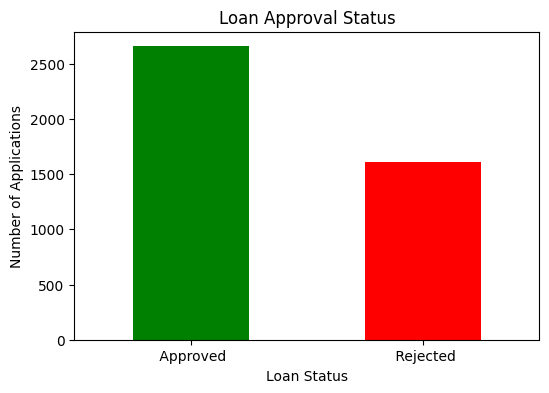

In [ ]:
#more approved or rejected
import matplotlib.pyplot as plt

# Count approved vs rejected
counts = df['loan_status'].value_counts()
print(counts)

# Bar plot
plt.figure(figsize=(6,4))
counts.plot(kind='bar', color=['green', 'red'])
plt.title('Loan Approval Status')
plt.xlabel('Loan Status')
plt.ylabel('Number of Applications')
plt.xticks(rotation=0)
plt.show()


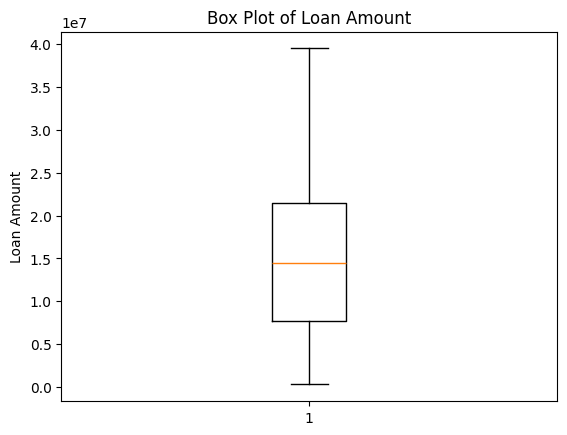

In [ ]:
#box plot for loan amount
import matplotlib.pyplot as plt

plt.boxplot(df['loan_amount'])
plt.title('Box Plot of Loan Amount')
plt.ylabel('Loan Amount')
plt.show()


In [ ]:
#which group has higher loan approval
df.groupby('education')['loan_status'].value_counts(normalize=True) * 100


education     loan_status
Graduate      Approved       62.453358
              Rejected       37.546642
Not Graduate  Approved       61.976471
              Rejected       38.023529
Name: proportion, dtype: float64

In [ ]:
#which feature looks imporantant for loan approval
df.groupby('loan_status')['cibil_score'].median()


,cibil_score
loan_status,
Approved,711.0
Rejected,429.0


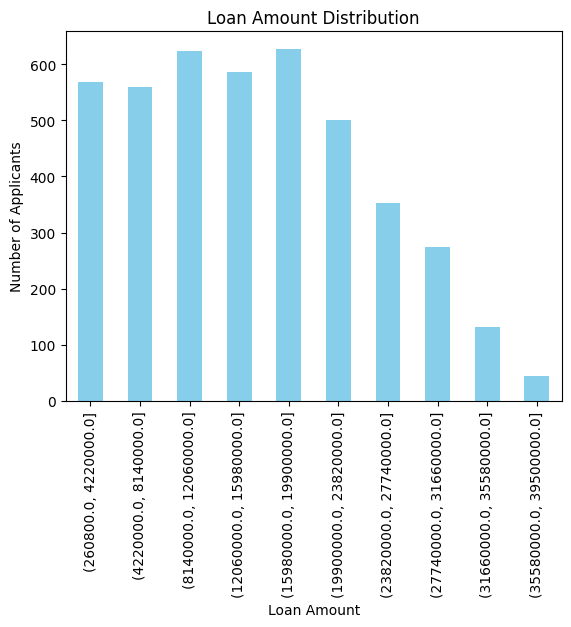

In [ ]:
#bar chart of loan status
import matplotlib.pyplot as plt
import pandas as pd

df['loan_bin'] = pd.cut(df['loan_amount'], bins=10)
df['loan_bin'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Number of Applicants')
plt.show()
